In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:
df = pd.read_excel('C:\\Users\\anny_\\Documents\\The_Glassdoor_Project\\Output\\glassdoor_jobs.xlsx', engine='openpyxl')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,med_salary,State,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,72.0,NM,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,87.5,MD,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,80,90,85.0,FL,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,97,76.5,WA,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,86,143,114.5,NY,22,1,0,0,0,1


In [42]:
def simplify_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'    

df['Job_Simplif'] = df['Job Title'].apply(simplify_title) # Job Title

df['Seniority'] = df['Job Title'].apply(seniority) # Seniority

df['description_len'] = df['Job Description'].apply(lambda x: len(x)) # Job description len

df['num_competitors'] = df['Competitors'].astype(str).apply(lambda x: len(x.split(',') if x != '-1' else '0')) # Count competitors

# Hour to anual wage
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x['Per Hour'] == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x['Per Hour'] == 1 else x.max_salary, axis=1)
df[df['Per Hour']==1][['Per Hour', 'min_salary', 'max_salary']]

df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', '')) # Remove new line Job Title

<AxesSubplot:>

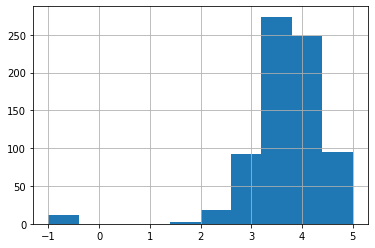

In [44]:
df.Rating.hist()

<AxesSubplot:>

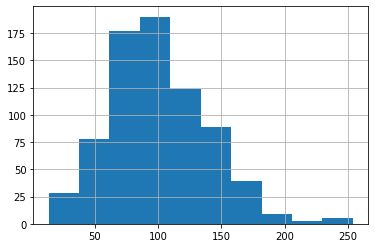

In [45]:
df.med_salary.hist()

<AxesSubplot:>

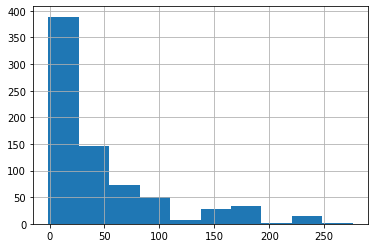

In [46]:
df.age.hist()

<AxesSubplot:>

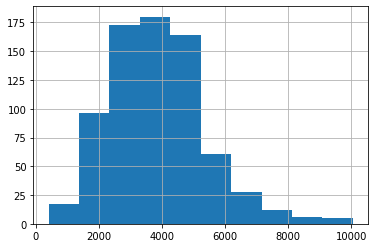

In [47]:
df.description_len.hist()

<AxesSubplot:>

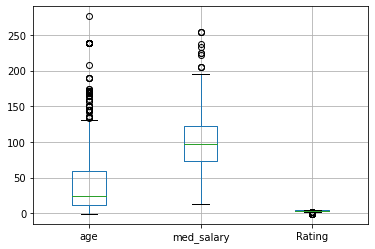

In [48]:
df.boxplot(column = ['age', 'med_salary', 'Rating'])

<AxesSubplot:>

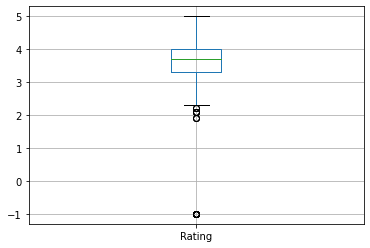

In [49]:
df.boxplot(column = 'Rating')

In [61]:
df[['age', 'med_salary', 'Rating', 'description_len']].corr() # Correlations

,age,med_salary,Rating,description_len
age,1.000000,0.019655,0.021655,0.163911
med_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
description_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

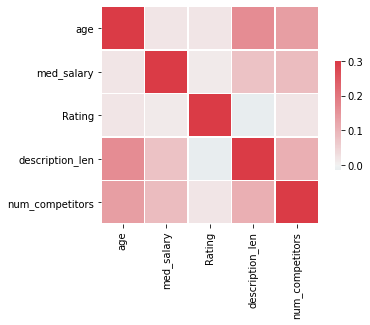

In [62]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'med_salary', 'Rating', 'description_len', 'num_competitors']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink':.5})

In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per Hour', 'Employer_Provided', 'min_salary', 'max_salary',
       'med_salary', 'State', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'Job_Simplif', 'Seniority', 'description_len',
       'num_competitors'],
      dtype='object')

Graph for Location: total = 200


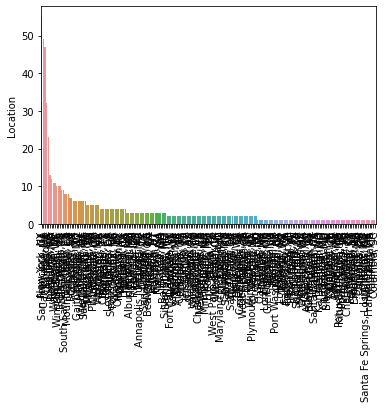

Graph for Headquarters: total = 198


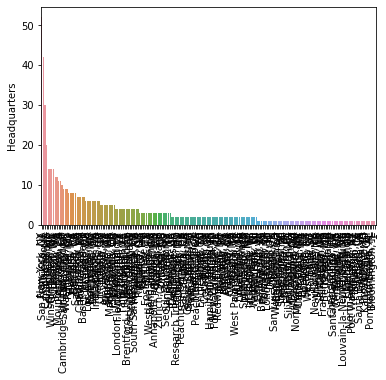

Graph for Size: total = 9


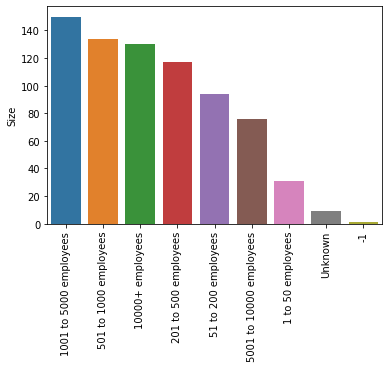

Graph for Type of ownership: total = 11


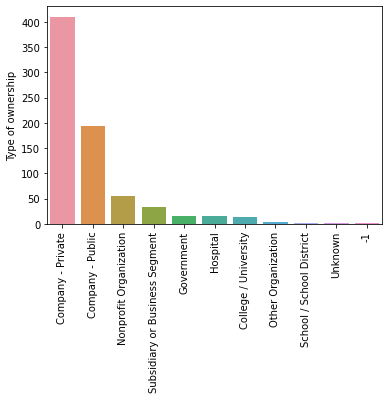

Graph for Industry: total = 60


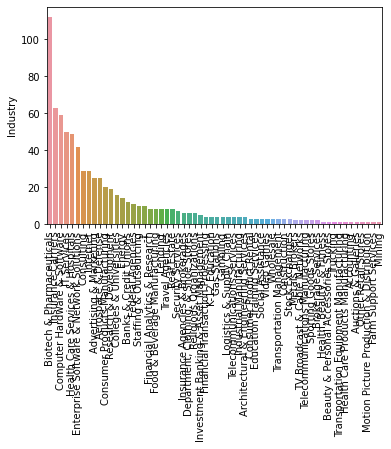

Graph for Sector: total = 25


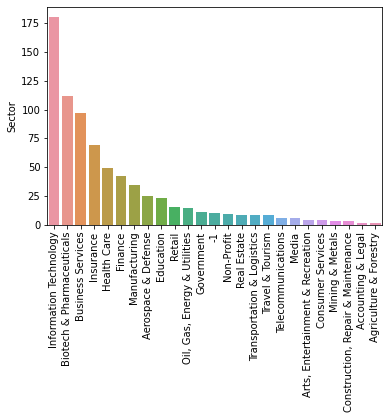

Graph for Revenue: total = 14


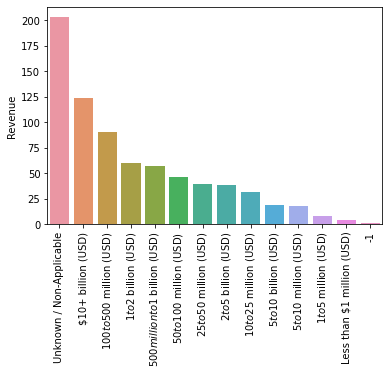

Graph for Company Name: total = 343


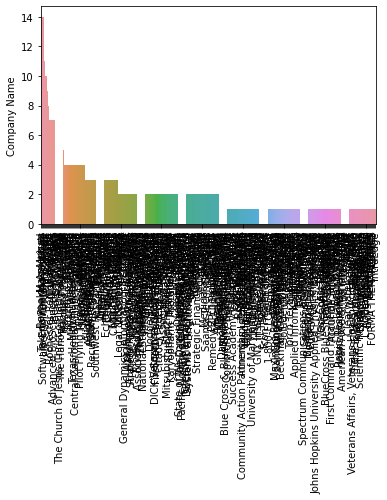

Graph for State: total = 38


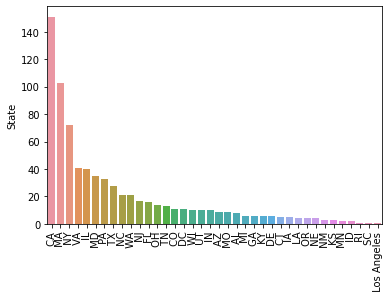

Graph for spark: total = 2


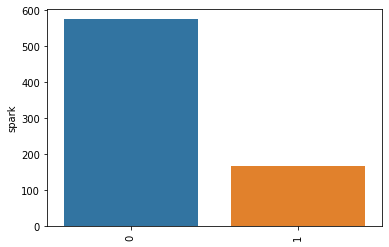

Graph for aws: total = 2


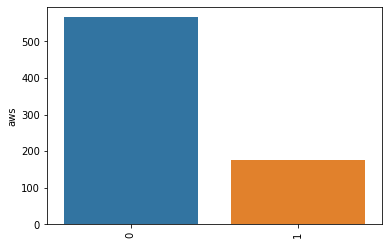

Graph for excel: total = 2


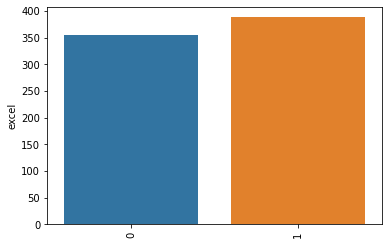

Graph for Job_Simplif: total = 7


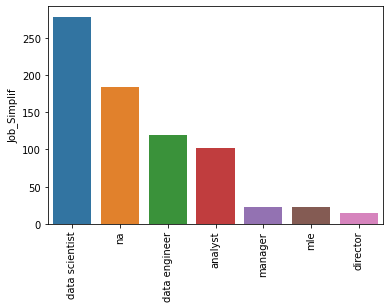

Graph for Seniority: total = 3


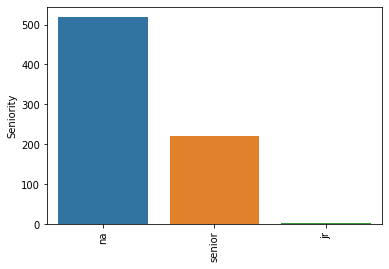

In [68]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 
             'State', 'spark', 'aws', 'excel','Job_Simplif', 'Seniority']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


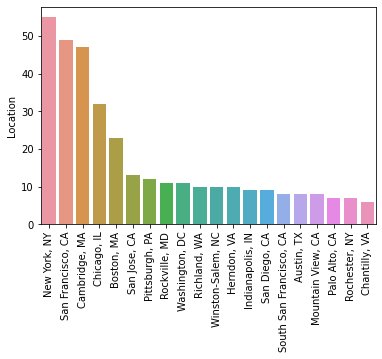

Graph for Headquarters: total = 20


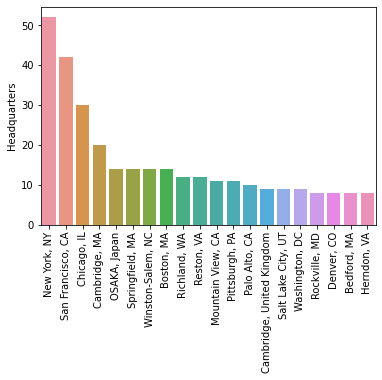

Graph for Company Name: total = 20


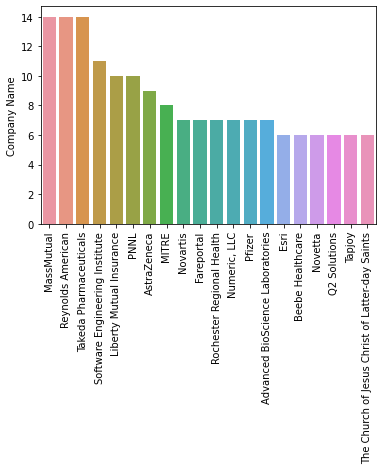

In [70]:
for i in df_cat[['Location', 'Headquarters', 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()